Actividad 6: Red Neuronal Convolusional

Alumno: Rogelio G. Tellez Martinez

Matricula: 2007528 Hora:N1 Grupo:007

Epoch 1/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1328 - accuracy: 0.9588 - val_loss: 0.0507 - val_accuracy: 0.9836
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0287 - val_accuracy: 0.9902
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0358 - accuracy: 0.9897
Exactitud del modelo en datos de prueba: 0.9897000193595886
1/1 [==============================] - 0s 21ms/step


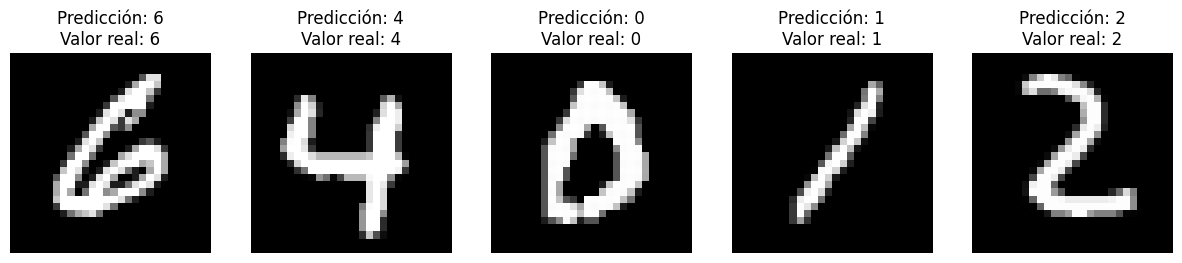

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Carga al conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

# Definir la estructura de la red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Exactitud del modelo en datos de prueba:", test_accuracy)
# Realizar predicciones y mostrar las imágenes
num_predicciones = 5
indices_aleatorios = np.random.choice(test_data.shape[0], num_predicciones, replace=False)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(1, num_predicciones, i + 1)
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Realizar la predicción
    prediction = model.predict(np.expand_dims(test_data[idx], axis=0))
    predicted_label = np.argmax(prediction)
    actual_label = test_labels[idx]
    plt.title(f"Predicción: {predicted_label}\nValor real: {actual_label}")

plt.show()